In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import calendar
plt.style.use('ggplot')
%matplotlib inline

In [2]:
westMaui = pd.read_csv('hui-west-maui-thru-2020-4th-quarter.0.csv')

In [3]:
southMaui = pd.read_csv('hui-south-maui-thru-2020-4th-quarter.0.csv')

In [4]:
westMaui.head()

Unnamed: 0   SampleID          SiteName Station  Session     Date   Time  \
0           1  RPO160614            Pohaku     RPO        1  6/14/16   8:03   
1           2  RKS160614  Kaanapali Shores     RKS        1  6/14/16   8:37   
2           3  RAB160614     Airport Beach     RAB        1  6/14/16   9:15   
3           4  RCB160614       Canoe Beach     RCB        1  6/14/16   9:50   
4           5  RWA160614          Wahikuli     RWA        1  6/14/16  10:24   

   Temp  Salinity    DO  ...  Turbidity  TotalN  TotalP  Phosphate  Silicate  \
0  25.7      33.3  6.86  ...      13.90  311.07   26.26      18.72   1697.47   
1  24.9      23.8  6.86  ...      16.80   75.08   18.80       9.06   1720.37   
2  26.8      35.0  6.72  ...       2.62   91.26   10.73       8.46    604.37   
3  27.2      34.7  6.78  ...       5.86  117.22   16.68       9.40    576.28   
4  27.3      34.6  6.66  ...       3.47   84.60   24.07      12.38    822.08   

      NNN   NH4        Lat        Long       QA issues or comments  
0  233.11  2.81  20.967083 -156.681390                         NaN  
1    5.65  4.15  20.949331 -156.691124                         NaN  
2   24.72  1.88  20.936669 -156.692780                         NaN  
3   49.04  2.27  20.910347 -156.689382                         NaN  
4   21.35  1.50  20.904476 -156.685931  NH4 below detectable limit  

[5 rows x 22 columns]

In [5]:
southMaui.head()

Unnamed: 0   SampleID             SiteName Station  Session     Date  \
0           1  KWP171107      Waipuilani Park     KWP        1  11/7/17   
1           2  KKS171107  Kihei South (Lipoa)     KKS        1  11/7/17   
2           3  KKP171107          Kalama Park     KKP        1  11/7/17   
3           4  KCP171107            Cove Park     KCP        1  11/7/17   
4           5  KKO171107      Kamaole Beach I     KKO        1  11/7/17   

    Time  Temp  Salinity    DO  ...  Turbidity  TotalN  TotalP  Phosphate  \
0   8:20  26.1      33.7  5.47  ...       8.20  132.62   17.13      12.14   
1   9:05  26.8      34.7  5.97  ...       5.17  141.30   13.44       8.81   
2   9:27  27.0      34.8  6.26  ...       8.47   96.36   11.27       7.87   
3   9:55  26.9      34.3  6.24  ...       1.12  376.91   24.78      22.58   
4  10:23  27.7      35.0  6.44  ...       1.00  146.98   11.93       7.35   

   Silicate     NNN    NH4        Lat        Long  QA issues or comments  
0    700.23   42.91   6.68  20.755056 -156.459602                    NaN  
1    395.31   25.26   5.24  20.747334 -156.457881                    NaN  
2    279.65   28.38   4.63  20.730973 -156.453720                    NaN  
3   1017.21  224.04  31.10  20.727434 -156.450077                    NaN  
4    397.99   24.47   4.70  20.721985 -156.448183                    NaN  

[5 rows x 22 columns]

In [6]:
#drop extra column
southMaui = southMaui.drop('Unnamed: 0', axis=1)
westMaui = westMaui.drop('Unnamed: 0', axis=1)

In [7]:
#26 sites
westMaui.groupby('Station').mean().shape

(26, 15)

In [8]:
#26 sites
southMaui.groupby('Station').mean().shape

(26, 15)

In [9]:
westMaui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SampleID               1555 non-null   object 
 1   SiteName               1555 non-null   object 
 2   Station                1555 non-null   object 
 3   Session                1555 non-null   int64  
 4   Date                   1555 non-null   object 
 5   Time                   1555 non-null   object 
 6   Temp                   1555 non-null   float64
 7   Salinity               1552 non-null   float64
 8   DO                     1553 non-null   float64
 9   DO_sat                 1555 non-null   float64
 10  pH                     1542 non-null   float64
 11  Turbidity              1553 non-null   float64
 12  TotalN                 1472 non-null   float64
 13  TotalP                 1472 non-null   float64
 14  Phosphate              1472 non-null   float64
 15  Sili

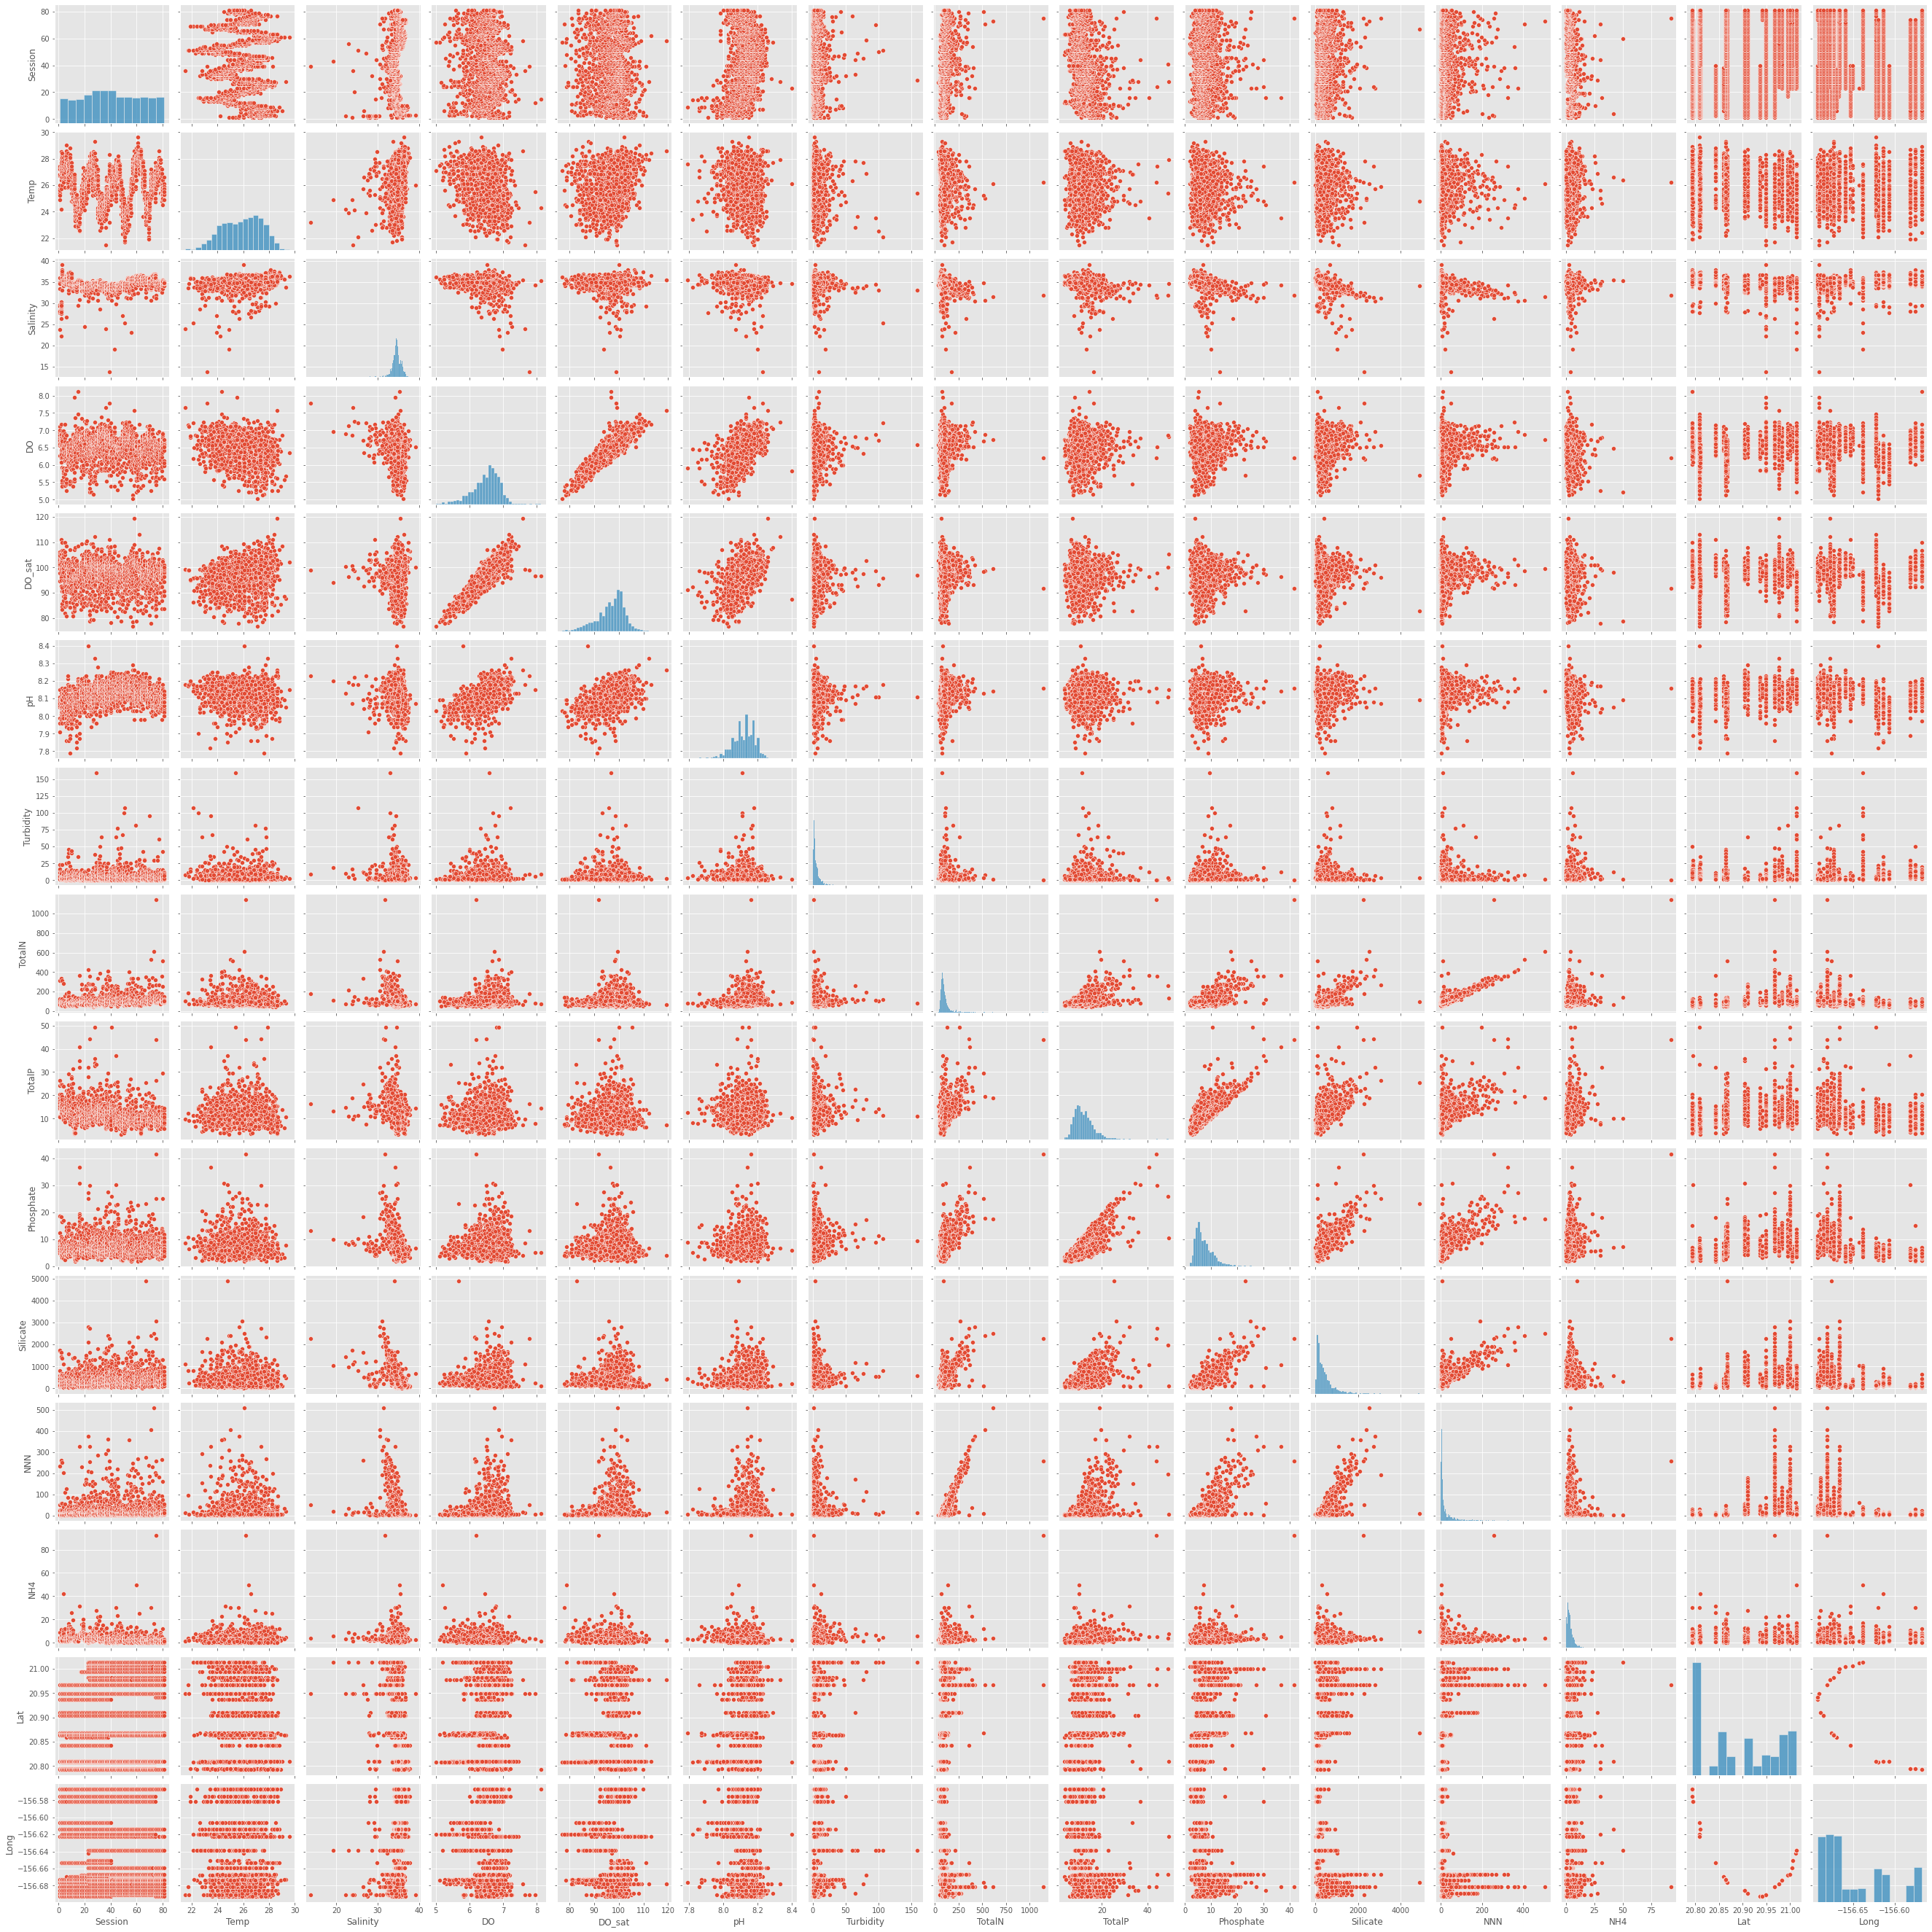

In [10]:
sns.pairplot(westMaui)

In [11]:
#Add Datetime format column
westMaui['Datetime'] = westMaui['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

Station
OCO    AxesSubplot(0.125,0.125;0.775x0.755)
OLP    AxesSubplot(0.125,0.125;0.775x0.755)
OMM    AxesSubplot(0.125,0.125;0.775x0.755)
OPB    AxesSubplot(0.125,0.125;0.775x0.755)
OPM    AxesSubplot(0.125,0.125;0.775x0.755)
OPP    AxesSubplot(0.125,0.125;0.775x0.755)
OSF    AxesSubplot(0.125,0.125;0.775x0.755)
OUB    AxesSubplot(0.125,0.125;0.775x0.755)
PFF    AxesSubplot(0.125,0.125;0.775x0.755)
PLH    AxesSubplot(0.125,0.125;0.775x0.755)
PLT    AxesSubplot(0.125,0.125;0.775x0.755)
PPU    AxesSubplot(0.125,0.125;0.775x0.755)
RAB    AxesSubplot(0.125,0.125;0.775x0.755)
RCB    AxesSubplot(0.125,0.125;0.775x0.755)
RFN    AxesSubplot(0.125,0.125;0.775x0.755)
RFS    AxesSubplot(0.125,0.125;0.775x0.755)
RHL    AxesSubplot(0.125,0.125;0.775x0.755)
RKO    AxesSubplot(0.125,0.125;0.775x0.755)
RKS    AxesSubplot(0.125,0.125;0.775x0.755)
RKT    AxesSubplot(0.125,0.125;0.775x0.755)
RKV    AxesSubplot(0.125,0.125;0.775x0.755)
RMO    AxesSubplot(0.125,0.125;0.775x0.755)
RNS    AxesSubplot(0.125

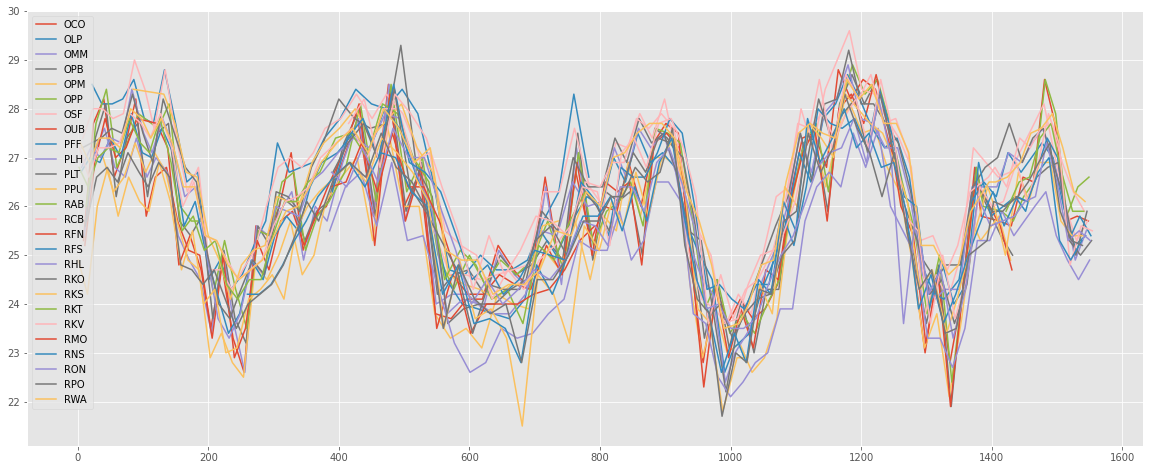

In [12]:
fig, ax = plt.subplots(1, figsize = (20, 8))
westMaui.set_index('Datetime')
westMaui.groupby('Station')['Temp'].plot(legend=True)

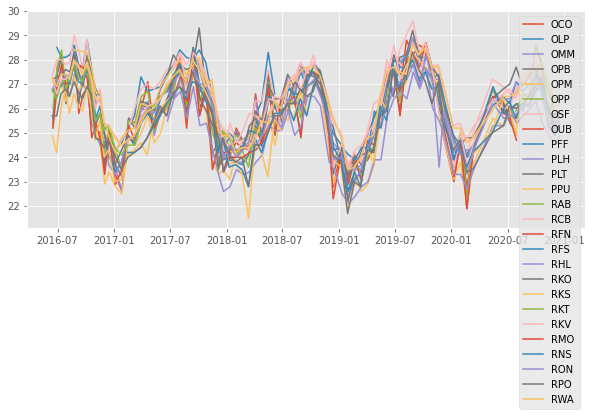

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in westMaui.groupby(['Station']):
    ax.plot(grp['Datetime'], grp['Temp'], label=key)

ax.legend()
plt.show()

# FBProphet Timeseries

In [14]:
from fbprophet import Prophet

In [15]:
rab = westMaui[(westMaui['Station'] == 'RAB')]

In [16]:
rab.head()

SampleID       SiteName Station  Session     Date  Time  Temp  Salinity  \
2   RAB160614  Airport Beach     RAB        1  6/14/16  9:15  26.8      35.0   
16  RAB160628  Airport Beach     RAB        2  6/28/16  8:22  26.4      27.6   
31  RAB160712  Airport Beach     RAB        3  7/12/16  8:16  27.0      36.3   
47  RAB160726  Airport Beach     RAB        4  7/26/16  8:12  27.2      35.3   
63  RAB160809  Airport Beach     RAB        5   8/9/16  8:11  27.1      35.4   

      DO  DO_sat  ...  TotalN  TotalP  Phosphate  Silicate    NNN   NH4  \
2   6.72   101.6  ...   91.26   10.73       8.46    604.37  24.72  1.88   
16  6.59    99.3  ...   90.93   16.97       8.28    510.71  26.44  2.59   
31  6.46    99.5  ...   79.38   16.45       7.04    331.03  15.44  1.58   
47  6.48    99.1  ...   87.42   13.39       6.82    267.63  16.56  6.02   
63  6.27    96.7  ...   70.02   14.87       6.66    322.69  22.60  2.38   

          Lat       Long  QA issues or comments   Datetime  
2   20.936669 -156.69278                    NaN 2016-06-14  
16  20.936669 -156.69278                    NaN 2016-06-28  
31  20.936669 -156.69278                    NaN 2016-07-12  
47  20.936669 -156.69278                    NaN 2016-07-26  
63  20.936669 -156.69278                    NaN 2016-08-09  

[5 rows x 22 columns]

In [17]:
rab.shape

(40, 22)

In [18]:
rab_temp = rab[['Datetime', 'Temp']]

In [19]:
rab_temp.shape

(40, 2)

In [20]:
rab_temp.head()

Datetime  Temp
2  2016-06-14  26.8
16 2016-06-28  26.4
31 2016-07-12  27.0
47 2016-07-26  27.2
63 2016-08-09  27.1

In [21]:
# first sample in 2016

rab_temp['Datetime'].min()

Timestamp('2016-06-14 00:00:00')

In [22]:
# most recent sample 2018

rab_temp['Datetime'].max()

Timestamp('2018-06-05 00:00:00')

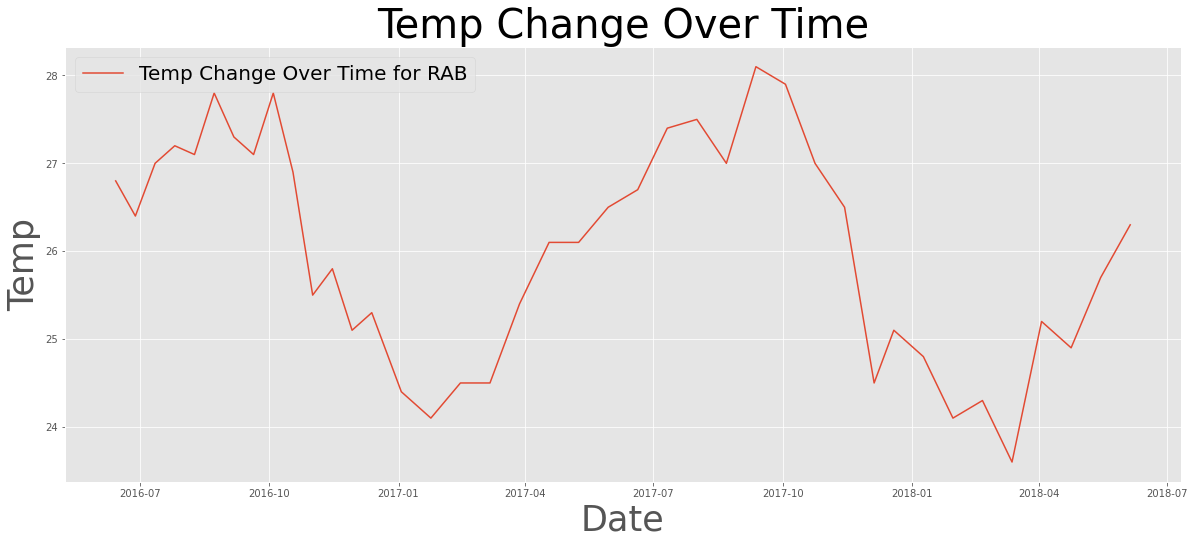

In [23]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab_temp['Datetime'].to_list()
ax.plot(dates, rab_temp['Temp'], label = "Temp Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Temp', fontsize = 35)
ax.set_title('Temp Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

In [24]:
rab_temp = rab_temp.rename(columns= {"Datetime": "ds", "Temp": "y"})

In [25]:
rab_temp.head()

ds     y
2  2016-06-14  26.8
16 2016-06-28  26.4
31 2016-07-12  27.0
47 2016-07-26  27.2
63 2016-08-09  27.1

In [26]:
m = Prophet(yearly_seasonality=True)
m.fit(rab_temp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
400 2019-06-01
401 2019-06-02
402 2019-06-03
403 2019-06-04
404 2019-06-05

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
400 2019-06-01  24.869756   24.496819   25.265245
401 2019-06-02  24.877489   24.483448   25.267686
402 2019-06-03  24.885769   24.502044   25.288696
403 2019-06-04  24.894642   24.485616   25.264053
404 2019-06-05  24.904065   24.555626   25.307442

(array([16922., 17045., 17167., 17287., 17410., 17532., 17652., 17775.,
        17897., 18017.]),
 [Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05')])

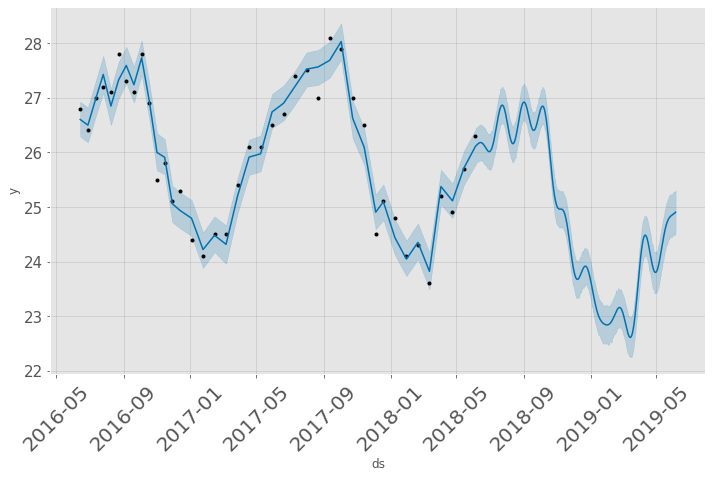

In [29]:
fig1 = m.plot(forecast)
plt.xticks(rotation = 45)

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(17167.0, 0, 'January 1'),
  Text(17226.0, 0, 'March 1'),
  Text(17287.0, 0, 'May 1'),
  Text(17348.0, 0, 'July 1'),
  Text(17410.0, 0, 'September 1'),
  Text(17471.0, 0, 'November 1'),
  Text(17532.0, 0, 'January 1')])

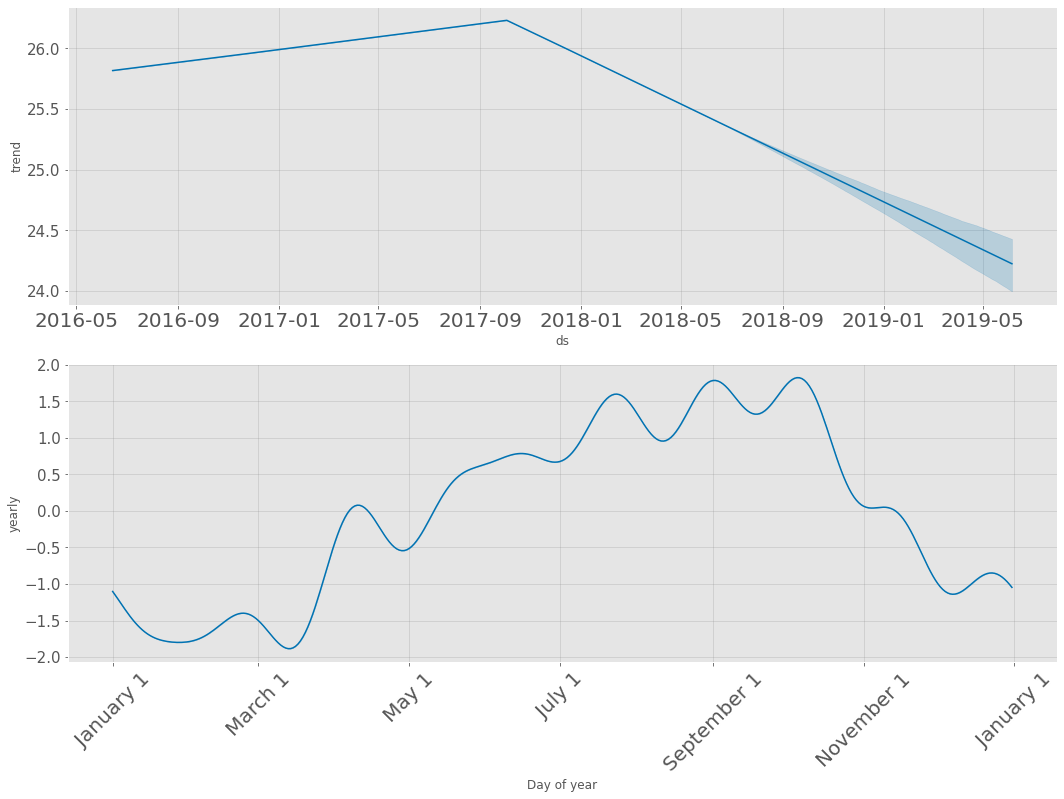

In [30]:
fig2 = m.plot_components(forecast, figsize=(15,10))
plt.xticks(rotation = 45)

In [31]:
rab.head()

SampleID       SiteName Station  Session     Date  Time  Temp  Salinity  \
2   RAB160614  Airport Beach     RAB        1  6/14/16  9:15  26.8      35.0   
16  RAB160628  Airport Beach     RAB        2  6/28/16  8:22  26.4      27.6   
31  RAB160712  Airport Beach     RAB        3  7/12/16  8:16  27.0      36.3   
47  RAB160726  Airport Beach     RAB        4  7/26/16  8:12  27.2      35.3   
63  RAB160809  Airport Beach     RAB        5   8/9/16  8:11  27.1      35.4   

      DO  DO_sat  ...  TotalN  TotalP  Phosphate  Silicate    NNN   NH4  \
2   6.72   101.6  ...   91.26   10.73       8.46    604.37  24.72  1.88   
16  6.59    99.3  ...   90.93   16.97       8.28    510.71  26.44  2.59   
31  6.46    99.5  ...   79.38   16.45       7.04    331.03  15.44  1.58   
47  6.48    99.1  ...   87.42   13.39       6.82    267.63  16.56  6.02   
63  6.27    96.7  ...   70.02   14.87       6.66    322.69  22.60  2.38   

          Lat       Long  QA issues or comments   Datetime  
2   20.936669 -156.69278                    NaN 2016-06-14  
16  20.936669 -156.69278                    NaN 2016-06-28  
31  20.936669 -156.69278                    NaN 2016-07-12  
47  20.936669 -156.69278                    NaN 2016-07-26  
63  20.936669 -156.69278                    NaN 2016-08-09  

[5 rows x 22 columns]

In [46]:
rab.columns

Index(['SampleID', 'SiteName', 'Station', 'Session', 'Date', 'Time', 'Temp',
       'Salinity', 'DO', 'DO_sat', 'pH', 'Turbidity', 'TotalN', 'TotalP',
       'Phosphate', 'Silicate', 'NNN', 'NH4', 'Lat', 'Long',
       'QA issues or comments', 'Datetime'],
      dtype='object')

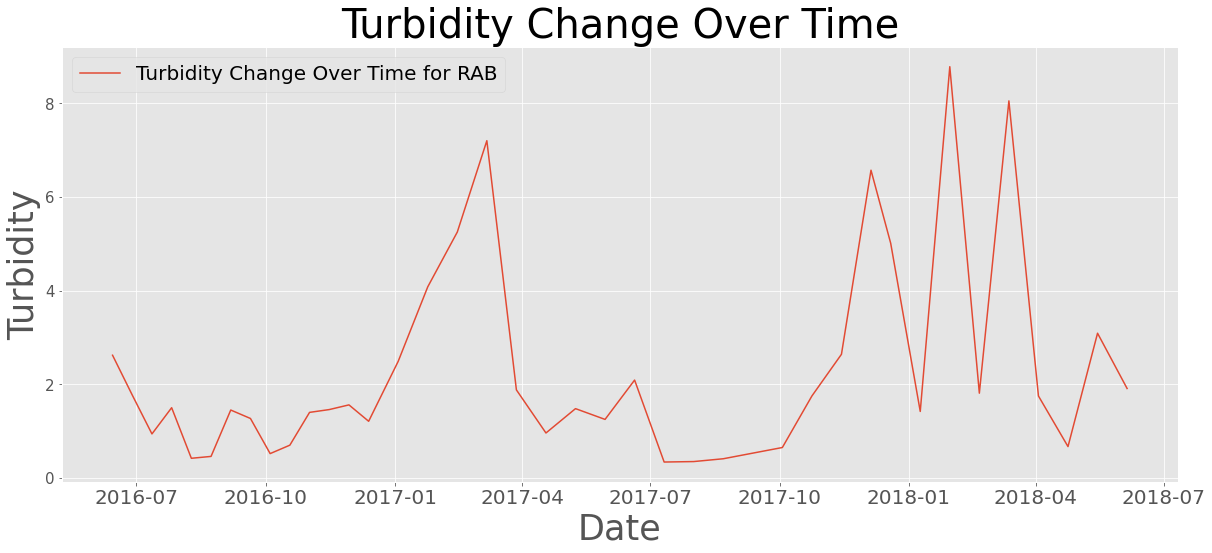

In [32]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['Turbidity'], label = "Turbidity Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Turbidity', fontsize = 35)
ax.set_title('Turbidity Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

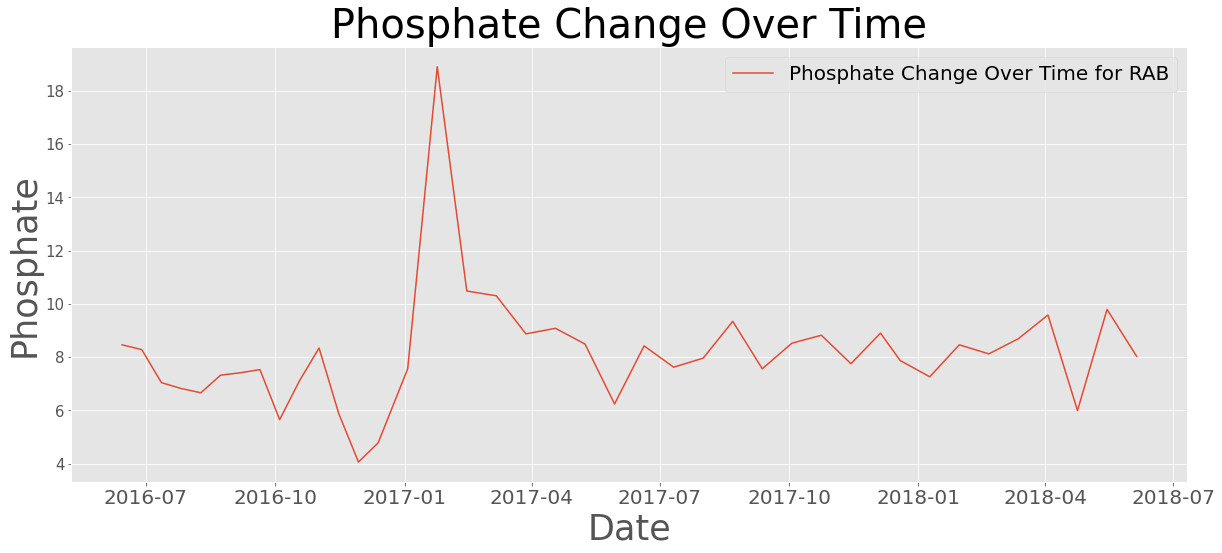

In [35]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['Phosphate'], label = "Phosphate Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Phosphate', fontsize = 35)
ax.set_title('Phosphate Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

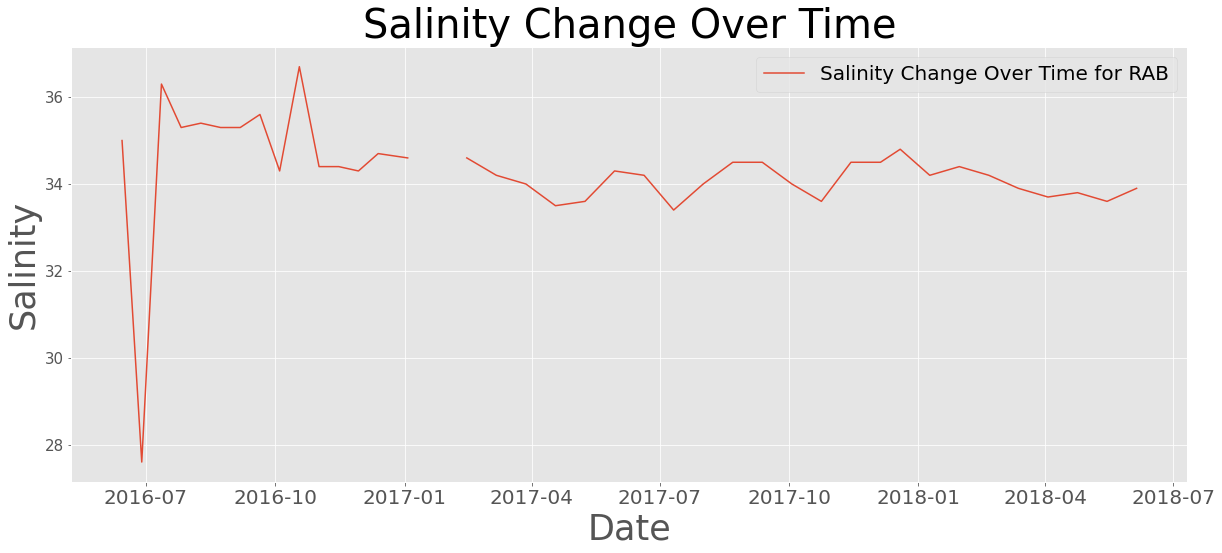

In [38]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['Salinity'], label = "Salinity Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Salinity', fontsize = 35)
ax.set_title('Salinity Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

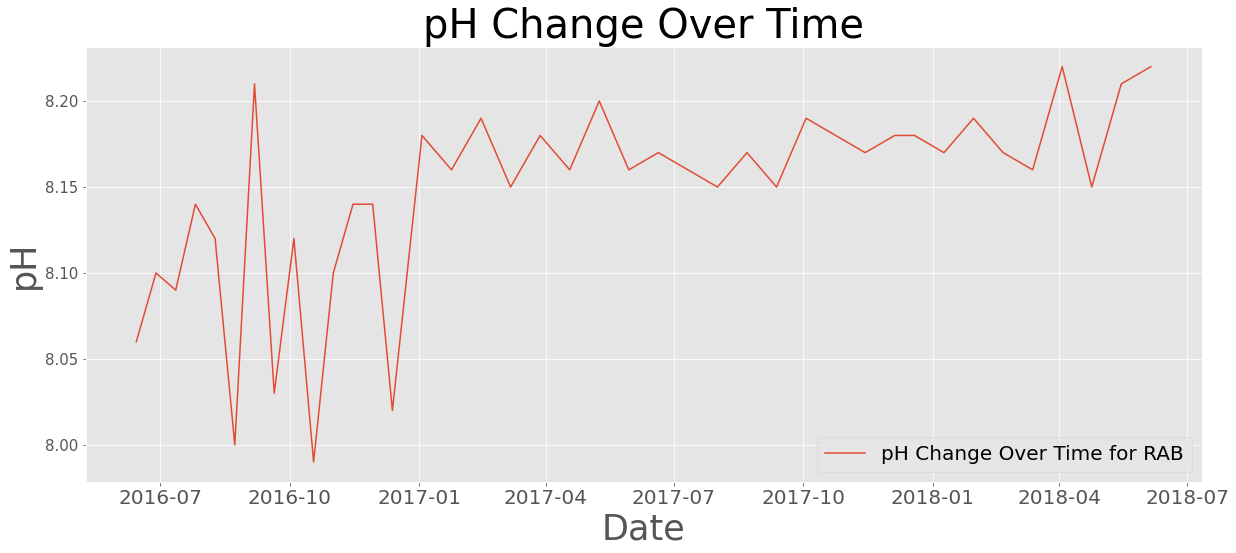

In [39]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['pH'], label = "pH Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('pH', fontsize = 35)
ax.set_title('pH Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

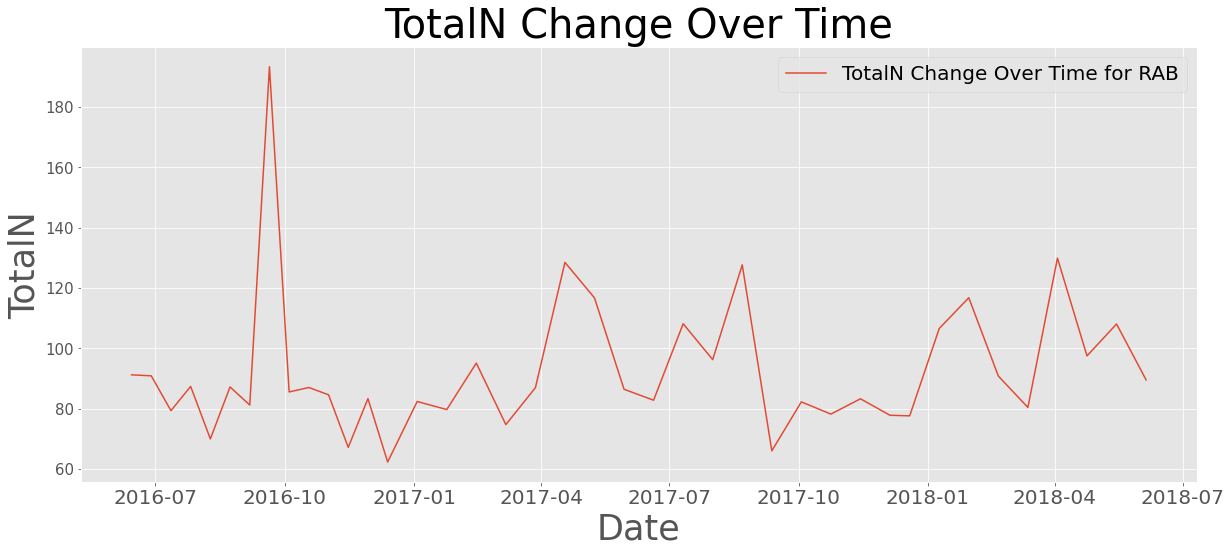

In [40]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['TotalN'], label = "TotalN Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('TotalN', fontsize = 35)
ax.set_title('TotalN Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

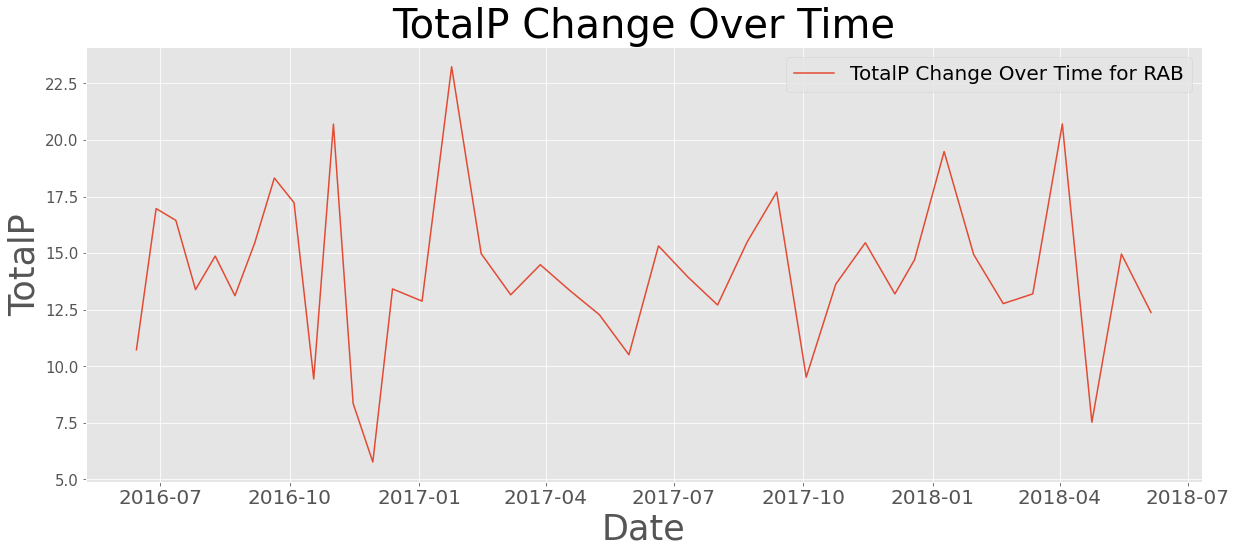

In [41]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['TotalP'], label = "TotalP Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('TotalP', fontsize = 35)
ax.set_title('TotalP Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

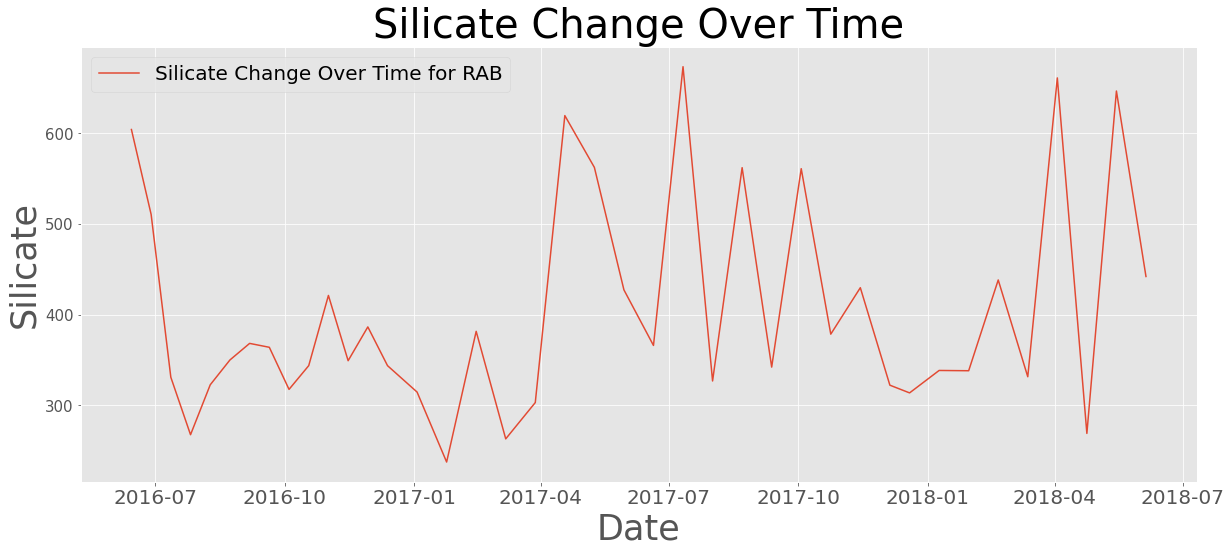

In [42]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['Silicate'], label = "Silicate Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Silicate', fontsize = 35)
ax.set_title('Silicate Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

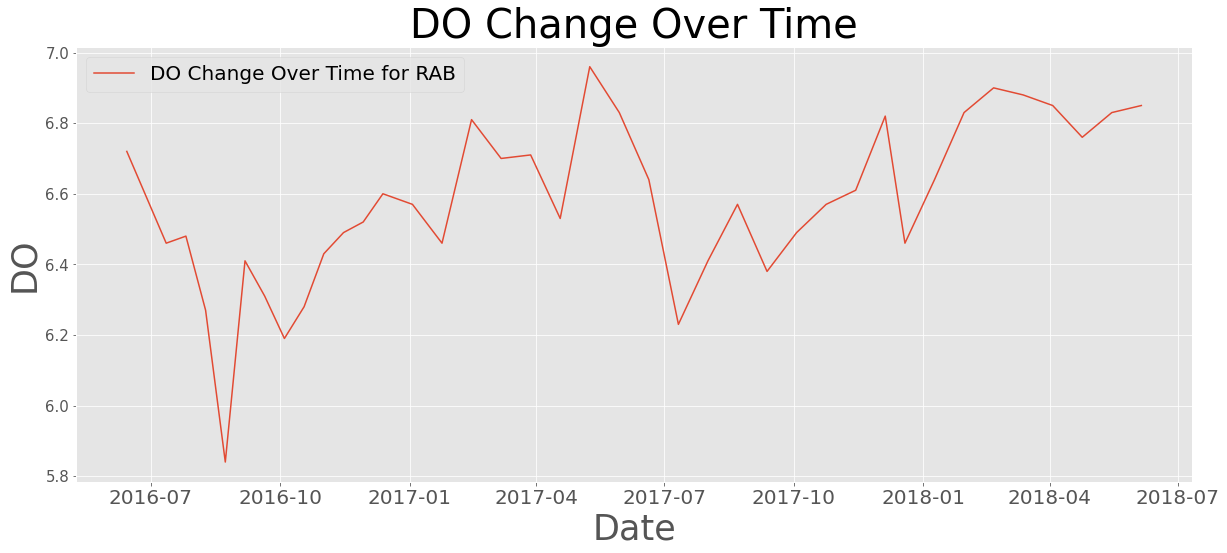

In [43]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = rab['Datetime'].to_list()
ax.plot(dates, rab['DO'], label = "DO Change Over Time for RAB")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('DO', fontsize = 35)
ax.set_title('DO Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

### What happened between August 2016 and March 2017 at Airport Beach?

In [44]:
rab.head()

SampleID       SiteName Station  Session     Date  Time  Temp  Salinity  \
2   RAB160614  Airport Beach     RAB        1  6/14/16  9:15  26.8      35.0   
16  RAB160628  Airport Beach     RAB        2  6/28/16  8:22  26.4      27.6   
31  RAB160712  Airport Beach     RAB        3  7/12/16  8:16  27.0      36.3   
47  RAB160726  Airport Beach     RAB        4  7/26/16  8:12  27.2      35.3   
63  RAB160809  Airport Beach     RAB        5   8/9/16  8:11  27.1      35.4   

      DO  DO_sat  ...  TotalN  TotalP  Phosphate  Silicate    NNN   NH4  \
2   6.72   101.6  ...   91.26   10.73       8.46    604.37  24.72  1.88   
16  6.59    99.3  ...   90.93   16.97       8.28    510.71  26.44  2.59   
31  6.46    99.5  ...   79.38   16.45       7.04    331.03  15.44  1.58   
47  6.48    99.1  ...   87.42   13.39       6.82    267.63  16.56  6.02   
63  6.27    96.7  ...   70.02   14.87       6.66    322.69  22.60  2.38   

          Lat       Long  QA issues or comments   Datetime  
2   20.936669 -156.69278                    NaN 2016-06-14  
16  20.936669 -156.69278                    NaN 2016-06-28  
31  20.936669 -156.69278                    NaN 2016-07-12  
47  20.936669 -156.69278                    NaN 2016-07-26  
63  20.936669 -156.69278                    NaN 2016-08-09  

[5 rows x 22 columns]